In [16]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import keras

In [17]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {keras.__version__}")

Tensorflow Version 2.15.0
Keras Version 2.15.0


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Changing directory to my drive
ROOT = "/content/drive/MyDrive/ANN implementation"
os.chdir(ROOT)

In [20]:
os.getcwd()

'/content/drive/MyDrive/ANN implementation'

# GPU / CPU Check

In [21]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [22]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [23]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Creating a simple classifier using keras on MNIST data

In [24]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [25]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [26]:
X_test.shape

(10000, 28, 28)

In [27]:
len(X_test[1][0])

28

In [28]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [29]:
len(X_train_full[5000:] )

55000

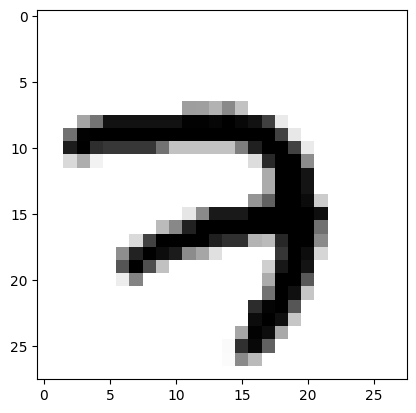

In [30]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

<Axes: >

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train_full[0], annot=True, cmap="binary")

<Axes: >

In [33]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [34]:
model_clf.layers

In [35]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [37]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [38]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [39]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [40]:
len(hidden1.get_weights()[1])

300

In [41]:
hidden1.get_weights()

[array([[ 0.05433518,  0.01443102, -0.06901409, ..., -0.03008455,
         -0.03869901, -0.07365255],
        [ 0.07261682,  0.06943135,  0.05276521, ...,  0.02563702,
         -0.03565369, -0.05436353],
        [ 0.03198999,  0.05690315,  0.04293639, ...,  0.07111785,
          0.04130064,  0.01715091],
        ...,
        [ 0.04677296, -0.05500097,  0.04059141, ...,  0.05330676,
          0.02025957, -0.02689082],
        [-0.03741211,  0.01974183,  0.06008452, ..., -0.0255932 ,
         -0.05950773, -0.01936277],
        [ 0.0398351 , -0.01879361, -0.07121503, ...,  0.01681077,
         -0.03856491, -0.0035696 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [42]:
weights, biases = hidden1.get_weights()

In [43]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.05433518,  0.01443102, -0.06901409, ..., -0.03008455,
        -0.03869901, -0.07365255],
       [ 0.07261682,  0.06943135,  0.05276521, ...,  0.02563702,
        -0.03565369, -0.05436353],
       [ 0.03198999,  0.05690315,  0.04293639, ...,  0.07111785,
         0.04130064,  0.01715091],
       ...,
       [ 0.04677296, -0.05500097,  0.04059141, ...,  0.05330676,
         0.02025957, -0.02689082],
       [-0.03741211,  0.01974183,  0.06008452, ..., -0.0255932 ,
        -0.05950773, -0.01936277],
       [ 0.0398351 , -0.01879361, -0.07121503, ...,  0.01681077,
        -0.03856491, -0.0035696 ]], dtype=float32)

In [44]:
print("shape\n", biases.shape)

shape
 (300,)


In [45]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


# Tensorboard callback Functions

In [46]:
# Log

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2024_01_28_05_40_32


# Early Stopping callback

In [47]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Model checkpointing callback

In [48]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [51]:
# Orginal train

EPOCHS = 10
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0762 - accuracy: 0.9787 - val_loss: 0.0951 - val_accuracy: 0.9744
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9797 - val_loss: 0.0900 - val_accuracy: 0.9748
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0664 - accuracy: 0.9819 - val_loss: 0.0863 - val_accuracy: 0.9766
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0619 - accuracy: 0.9830 - val_loss: 0.0874 - val_accuracy: 0.9764
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0580 - accuracy: 0.9840 - val_loss: 0.0826 - val_accuracy: 0.9758
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0546 - accuracy: 0.9854 - val_loss: 0.0795 - val_accuracy: 0.9780
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0509 - accuracy: 0.9867 - val_loss: 0.0816 - val_accuracy:

In [52]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0399 - accuracy: 0.9902 - val_loss: 0.0745 - val_accuracy: 0.9790
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0376 - accuracy: 0.9901 - val_loss: 0.0755 - val_accuracy: 0.9770
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9916 - val_loss: 0.0717 - val_accuracy: 0.9792
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0335 - accuracy: 0.9918 - val_loss: 0.0728 - val_accuracy: 0.9792
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0316 - accuracy: 0.9926 - val_loss: 0.0727 - val_accuracy: 0.9790
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0297 - accuracy: 0.9933 - val_loss: 0.0713 - val_accuracy: 0.9780
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0282 - accuracy: 0.9936 - val_loss: 0.0716 - val_accuracy:

# Saving the Model

In [53]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [54]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2024_01_28_05_45_34_.h5 will be saved at TRAINED_MODEL/Model_2024_01_28_05_45_34_.h5


'TRAINED_MODEL/Model_2024_01_28_05_45_34_.h5'

In [55]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

<ipython-input-55-87cef6f4b7ac>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_clf, UNIQUE_PATH)


In [56]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [57]:
# history.history

In [ ]:
pd.DataFrame(history.history)

<Axes: >

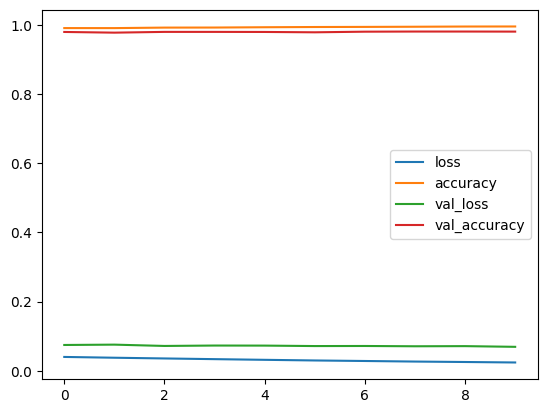

In [59]:
pd.DataFrame(history.history).plot()

In [60]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9761


[0.07770700007677078, 0.9761000275611877]

In [61]:
x_new = X_test[:3]
# x_new

In [62]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [63]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 78ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.992, 0.001, 0.   , 0.001, 0.   , 0.   , 0.003, 0.002,
        0.   ]], dtype=float32)

In [64]:
y_pred = np.argmax(y_prob, axis = -1)

In [65]:
y_pred

array([7, 2, 1])

In [67]:
actual

array([7, 2, 1], dtype=uint8)

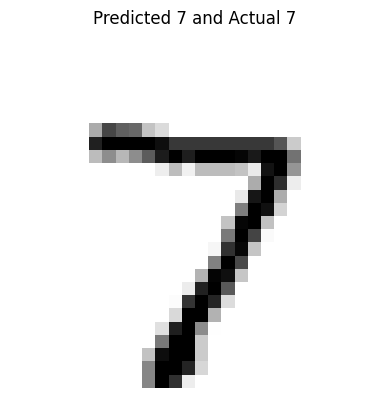

######################


######################


######################


In [66]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

In [72]:
%load_ext tensorboard

In [73]:
%tensorboard --logdir logs/fit

Output hidden; open in https://colab.research.google.com to view.